## Predicting the species of a penguin based on physical attributes on penguins_size.csv dataset using Machine Learning algorithms.
<b>  In this article, we will use the same dataset "penguins_size.csv", which we have used in previous in Decision Tree Algorithm. By using the same dataset, we can compare the Random Forest classifier with Decision tree. Here we are going to predict the species of a penguin based on physical attributes on penguins_size.csv dataset using Machine Learning algorithms. The algorithms included Random Forest Algorithm.


## Step - 1 : Business Problem Understanding
<b> Create a model that can help to predict a species of a penguins based on physical attributes, then we can use that model to help researchers to classify the penguins in the field, instead of needing an expperienced biologist.
    
<b> Predicting the species of a penguin based on given new data, i.e. culmen_length_mm=30, culmen_depth_mm=20, flipper_length_mm=178, body_mass_g=3500, island="Dream" and sex="MALE".
    
- <b> Predicting the species of a penguin based on physical attributes on penguins_size.csv dataset using Machine Learning algorithms, included Random Forest Algorithm.
    
- <b> On the basis of this data, how should they predict the species of a penguin based on physical attributes ? 
   1. Is there a relationship between each variables (island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g and sex.) and species (Predicting the species of a penguin based on physical attributes) ?
   2. How strong is that relationship ?
   3. Which variables contribute to species (Predicting the species of a penguin based on physical attributes) ?
   4. What is the effect of each variables on species (Predicting the species of a penguin based on physical attributes) ?

    

<b> importing all the necessary libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [4]:
# Load the dataset.
df = pd.read_csv("penguins_size.csv")

# Display the first 5 lines using the head() method.
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 2.2 Data Understanding


<b> penguins_size.csv : Simplified data from original penguin data sets. Contains variables:
- species: penguin species (Chinstrap, Adélie, or Gentoo).

- culmen_length_mm: culmen length (mm).

- culmen_depth_mm: culmen depth (mm).

- flipper_length_mm: flipper length (mm).

- body_mass_g: body mass (g).

- island: island name (Dream, Torgersen, or Biscoe).

- sex: penguin sex.

<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(344, 7)

<b> From the output, we can see that the table contains 344 rows and 7 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<b> float64 and object are the data types of our features. We see 4 features are numeric (features are float64) and 3 features are categorical. With this same method, we can easily see if there are any missing values. Here, culmen_length_mm, culmen_depth_mm, flipper_length_mm and body_mass_g columns are missing 2 null values and sex column is missing 10 null values and remaining columns are none because each remaining column contains 344 observations, the same number of rows we saw before with shape.
   

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)
- <b> On the basis of this data, how should they predict the species of a penguin based on physical attributes ?
    
   1. Is there a relationship between each variables (island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g and sex.) and species (Predicting the species of a penguin based on physical attributes) ?
   2. How strong is that relationship ?
   3. Which variables contribute to species (Predicting the species of a penguin based on physical attributes) ?
   4. What is the effect of each variables on species (Predicting the species of a penguin based on physical attributes) ?



<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<b> For categorical (type object) features we can use the value_counts method. Let's have a look at the distribution of species:
    
<b> Checking the unique values/categories from the target variable (species)

In [5]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<b> As we can see, there are 3 unique values in the target variable (species), i.e. Adelie, Chinstrap and Gentoo.

<b> Now use the value_counts method on target variable (species).

In [6]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<b> Adelie=152, Gentoo=124 and Chinstrap=68 Out-of 344 records.

<b> Now use the value_counts method on island variable.

In [8]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

<b> Biscoe=168, Dream=124 and Torgersen=52 Out-of 344 records.

<b> Now use the value_counts method on sex variable.

In [9]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

<b> MALE=168, FEMALE=165 and  "."=1, there is a "." in the sex column. As we do not know which sex it belongs to we will assign NaN to it.

In [10]:
# checking the "." recod
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
# replacing "." to NaN
df['sex'][df['sex'] == '.'] = np.nan

# print the replaced record.
print(df.loc[336])

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                     NaN
Name: 336, dtype: object


<b> As we can see, we have replaced "." value with NaN in the sex variable.

### 3.2 Data Visualization :
<b> Draw the ScatterPlot with Flipper Length and Body Mass:

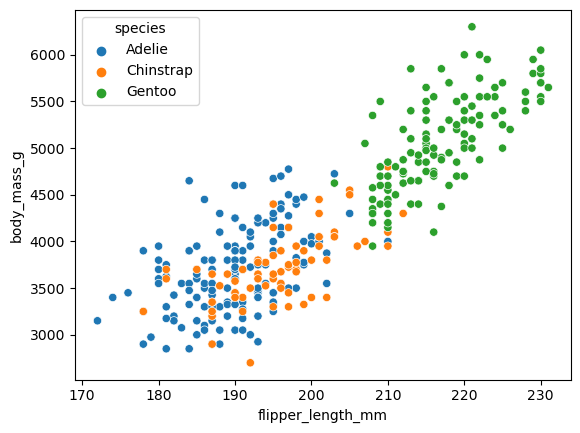

In [12]:
# Draw the scatterplot.
# Pass x = 'flipper_length_mm', y = 'body_mass_g', variables.
# Pass hue="species"
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=df)

# Display all figures.
plt.show()

<b> Draw the ScatterPlot with Culmen Length and Culmen Depth:

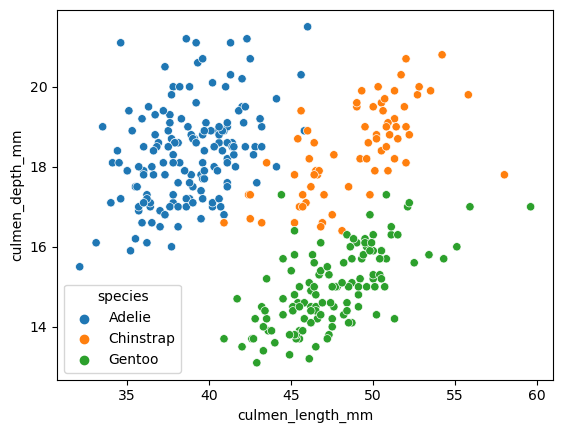

In [13]:
# Draw the scatterplot.
# Pass x = 'culmen_length_mm', y = 'culmen_depth_mm', variables.
# Pass hue="species"
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", hue="species", data=df)

# Display all figures.
plt.show()

<b> Draw the countplot for species variable:

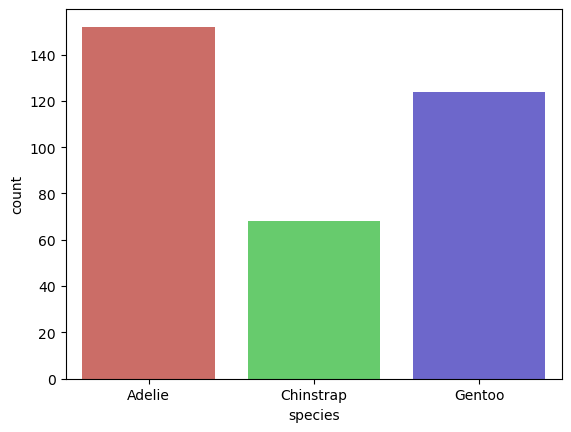

In [14]:
# Draw the countplot.
sns.countplot(x='species',data=df, palette='hls')

# Display all figures.
plt.show()

<b> Draw the pairplot with data=df and hue="species:

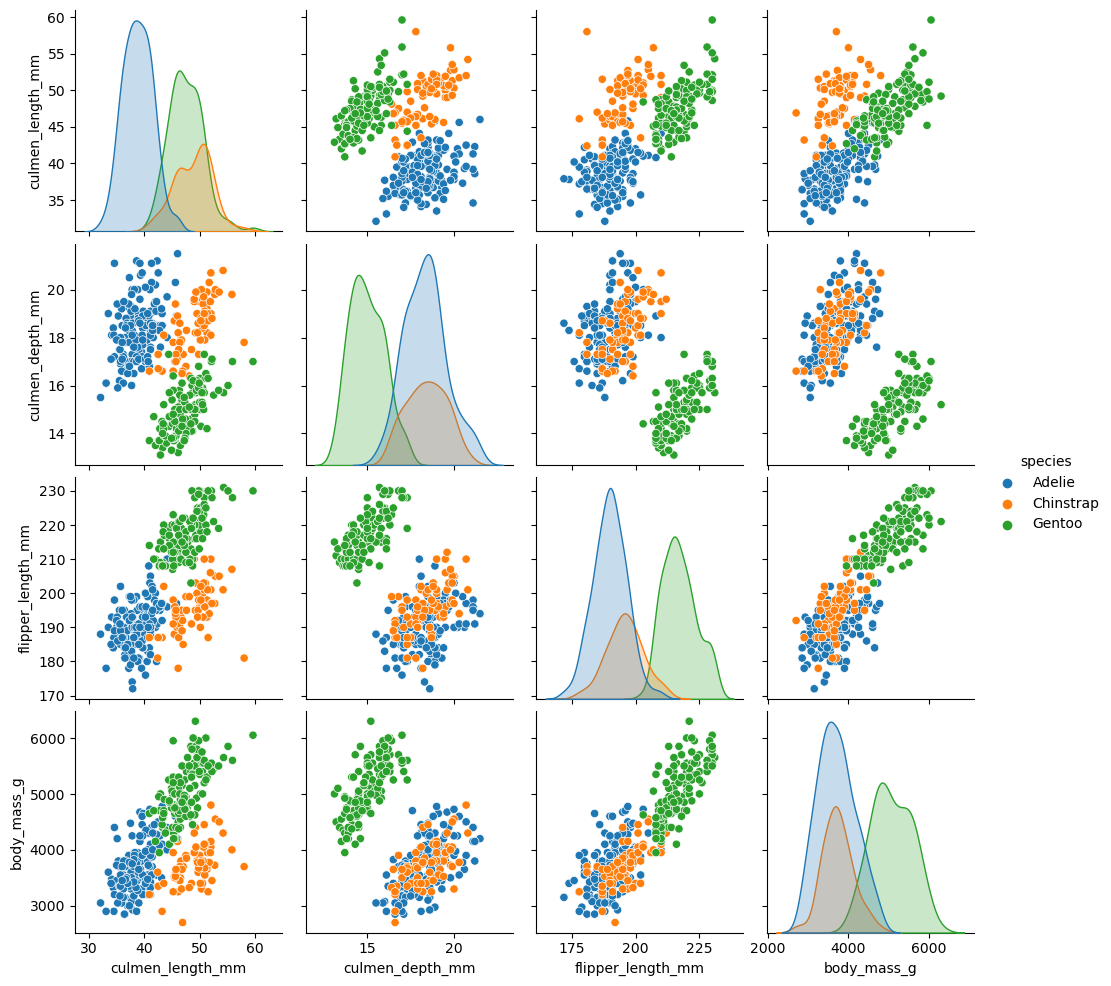

In [15]:
# Draw the pairplot.
sns.pairplot(data=df, hue="species")

# Display all figures.
plt.show()

### 3.3 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [16]:
# Check the missing values records.
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<b> In the above, we can see that the culmen_length_mm, culmen_depth_mm, flipper_length_mm and body_mass_g columns are missing 2 null values (records) and sex column is missing 10 null values (records).
    
<b> So here we are removing missing values by using dropna()

In [17]:
# drop the missing values/records.
df.dropna(inplace=True)

<b> Now once-again checking the the Empty cells / Missing values after removing missing values/records:

In [18]:
# Check the missing values records.
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<b> In the above, we can see that there is no missing values.

<b> After removing missing values/records, let’s have a look at data dimensionality once-again:

In [19]:
df.shape

(333, 7)

### 3.4 Encoding
<b> Island and Sex variables are categorical variables, we have to convert these variables into dummy/indicator variables, here we are doing it using pandas get_dummies:
    
<b> Encoding of target (species) variable is not required, hence we are droping "species" variable and same storing in the "df1" DataFrame (object).

In [20]:
# drop the target variable and store it as "df1" object.
df1 = df.drop("species", axis=1)

In [21]:
# Apply the Encoding by using get_dummies() on "df1" object.
df1 = pd.get_dummies(df1, drop_first=True)

# print the "df1" object.
df1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


### 3.5 Train/Test Split
<b> Creating independent variables ("culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "island_Dream", "island_Torgerse", "sex_MALE") as "x" variable and dependent variable "species" as "y" variable.

In [22]:
# Create x and y variables.
x = df1[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", 
         "body_mass_g", "island_Dream", "island_Torgersen", "sex_MALE"]]   # independent variables
y = df["species"]                                                          # dependent variable  

In [23]:
# Print the x variable.
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [24]:
# Print the y variable.
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

<b> In the above, I have created x variable with 7 independent (input) variables and y variable with 1 dependent (output) variable.

In [25]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [26]:
x_train.shape, x_test.shape

((266, 7), (67, 7))

In [27]:
y_train.shape, y_test.shape

((266,), (67,))

## Step - 4 : Random Forest Algorithm Modelling and Evaluation with default Prameters:
<b> Random Forest Algorithm (Baseline Model)

In [28]:
# Modelling
# import the RandomForestClassifier from sklearn.ensemble library.
from sklearn.ensemble import RandomForestClassifier

# Create the classifier object (model) as "dt_default".
rf_default = RandomForestClassifier(random_state=41)

# Train the model using training sets
rf_default.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = rf_default.predict(x_train)

# Predict on the test data set.
test_predictions = rf_default.predict(x_test)

# Evaluation
# import the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the train accuary
print("Train_accuracy:", accuracy_score(y_train, train_predictions))

# print the test accuracy
print("Test_accuracy:", accuracy_score(y_test, test_predictions))

# Cross Validation Score
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(rf_default, x, y, cv=5).mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
Cross Validation Score: 0.9909995477159657


In the above, we have fitted the Random Forest classifier to the training data. First we have imported the RandomForestClassifier class of Sklearn.ensemble library. After importing the class, we have created the Classifier object of the class. The Parameter of this class are as :

- n_estimators (default=100): The number of trees in the forest.
- criterion: The function to measure the quality of a split, by default criterion=='gini'.
- max_depth: The maximum depth of the tree. by default it's None, then nodes are expanded until all leaves contain less than min_samples_split samples.
- min_samples_split: The minimum number of samples required to split an internal node, by default it's 2.
- min_samples_leaf: The minimum number of samples required to be at a leaf node, by default it's 1.
- max_features: The number of features to consider when looking for the best split, by default it's None.
- random_state: The seed for the random number generator, by default it's None.
- bootstrap (default=True): If bootstrap=True : all decision trees has same probability of selecting of records, in other words the whole dataset is used to build each tree, i.e. data with replacement. If bootstrap=False : Once data is used by any decision tree, then that data we can't use for other decision trees, i.e. data without replacement.
    


And then we have fitted the classifier to the training data. After that we have predicted the test and train results.


And finally we have done with evaluation i.e. train accuracy, test accuray and crooss validation score.

<b> Random Forest Algorithm with default parameters, the training set and testing set performances are comparable. From the above we conclude that, we have got a good model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 99.09% with this model.

### Checking the importance of each feature givan by this model:
<b> Here we are going to check the importance of each fature by using feature_importances_
    
<b> Feature Importance is a score assigned to the features of a Machine Learning model that defines how “important” is a feature to the model's prediction. It can help in feature selection and we can get very useful insights about our data.

In [30]:
rf_default.feature_importances_

array([0.34868138, 0.19688559, 0.22019256, 0.10115168, 0.10923796,
       0.01923571, 0.00461513])

In [31]:
# Displaying each variables with there feature_importances_
pd.DataFrame(index=x.columns, data=rf_default.feature_importances_, columns=["Feature Importance"])

,Feature Importance
culmen_length_mm,0.348681
culmen_depth_mm,0.196886
flipper_length_mm,0.220193
body_mass_g,0.101152
island_Dream,0.109238
island_Torgersen,0.019236
sex_MALE,0.004615


<b> In the above, we can see that all the features are important. There is no less importance features.

## Hyper Parameter Tuning for Random Forest classifier
<b> Here we are using GridSearchCV() function. GridSearchCV() function is used to identify the best value (parameter) within given dat by appling cross validation (CV).
    
<b> Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy.
    
    
Here We will use some hyperparamters as follows: 
    
   - estimator: estimator object, this is assumed to implement the scikit-learn estimator interface.
   - param_griddict or list of dictionaries: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
   - n_estimators (default=100): The number of trees in the forest.
   - criterion: The function to measure the quality of a split, by default criterion=='gini'.
   - max_depth: The maximum depth of the tree. by default it's None, then nodes are expanded until all leaves contain less than min_samples_split samples.
   - scoring: maximum accuracy.
   - CV (default=5): Cross validation score.


In [32]:
# import the GridSearchCV from sklearn.model_selection library.
from sklearn.model_selection import GridSearchCV

# Model
estimator = RandomForestClassifier(random_state=41)

# Parameters and values.
param_grid = {'n_estimators':list(range(1,101))}

# Identify the best value of the parameter within given values for the given data.
grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

# fit the model on our train set.
grid.fit(x_train,y_train)

# get the best hyperparameters.
grid.best_params_

{'n_estimators': 23}

<b> From the above, we have got the best parameter, i.e. 'n_estimators': 23

## Step - 4 : Random Forest Algorithm Modelling and Evaluation with Best Hyper Prameters:
<b> Rebuilding the Random Forest Algorithm with best hyperparameters.

In [33]:
# Modelling
# import the RandomForestClassifier from sklearn.ensemble library.
from sklearn.ensemble import RandomForestClassifier

# Create the classifier object (model) as "dt_default".
rf_best = RandomForestClassifier(n_estimators=23, random_state=41)

# Train the model using training sets
rf_best.fit(x_train, y_train)

# Prediction
# Predict on the train data set.
train_predictions = rf_best.predict(x_train)

# Predict on the test data set.
test_predictions = rf_best.predict(x_test)

# Evaluation
# import the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the train accuary
print("Train_accuracy:", accuracy_score(y_train, train_predictions))

# print the test accuracy
print("Test_accuracy:", accuracy_score(y_test, test_predictions))

# Cross Validation Score
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(rf_best, x, y, cv=5).mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
Cross Validation Score: 0.9940298507462686


<b> From the above, Random Forest Algorithm with best parameters, the training set and testing set performances are comparable. From the above we conclude that, we have got a good model on train and test data sets. We got an train accuracy of 100%, test accuracy of 100% and cross validate score of 99.40% with this model.
    
    
<b> As we can see that the test accuracy of Random Forest Algorithm with best parameters is equal to the Random Forest Algorithm with default parameters. Hence we conclude that the Random Forest Algorithm with default parameters is a good model for this dataset, because it will take less time to build the model as compare to the Random Forest Algorithm with best parameters. we have got a good model on train and test data sets.
    
    
<b> Now we can compare the Random Forest classifier with Decision tree for this dataset. The train accuracy, test accuracy and cross validation score is higher in Random Forest Algorithm as compare to the Decision Tree Algorithm. Hence Random Forest Algorithm with default model is a best mode for this dataset.

In [34]:
x_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
343,49.9,16.1,213.0,5400.0,0,0,1
301,52.5,15.6,221.0,5450.0,0,0,1
4,36.7,19.3,193.0,3450.0,0,1,0
230,40.9,13.7,214.0,4650.0,0,0,0
256,42.6,13.7,213.0,4950.0,0,0,0
...,...,...,...,...,...,...,...
290,47.7,15.0,216.0,4750.0,0,0,0
95,40.8,18.9,208.0,4300.0,1,0,1
250,47.3,15.3,222.0,5250.0,0,0,1
330,50.5,15.2,216.0,5000.0,0,0,0


### Prediction on the new data.

<b> Predicting the species of a penguin based on given new data, i.e. culmen_length_mm=30, culmen_depth_mm=20, flipper_length_mm=178, body_mass_g=3500, island="Dream" and sex="MALE".

Before predicting on Random Forest Algorithm with default parameters model we need to do preprocessing, as we have done with Random Forest Algorithm with default parameters model.

As above we have done with Encoding for "island" and "sex" variables. Applying the preprocessing on new data then we get as follows:

culmen_length_mm=30, culmen_depth_mm=20, flipper_length_mm=178, body_mass_g=3500, island_Dream=1, island_Torgersen=0 and sex=1

In [36]:
# Predict on new data.
rf_default.predict([[30,20,178,3500,1,0,1]])

array(['Adelie'], dtype=object)

<b> As we can see that, we have predicted as species="Adelie" for a given new data.